# Script contents:
1. Import libraries and data
2. Data preprocessing
3. Exploratory analysis
4. Plot the map 

In [1]:
import pandas as pd
import os
from keplergl import KeplerGl
from pyproj import CRS
import numpy as np
from matplotlib import pyplot as plt

In [5]:
df = pd.read_csv("NY_citibikes_data.csv", usecols=['date', 'avgTemp', 'ride_id', 'start_station_name', 'end_station_name','start_lat','start_lng','end_lat','end_lng'])

In [6]:
df.head()# Read just the header

,ride_id,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,date,avgTemp
0,BFD29218AB271154,West End Ave & W 107 St,Mt Morris Park W & W 120 St,40.802117,-73.968181,40.804038,-73.945925,2022-01-21,-6.0
1,7C953F2FD7BE1302,4 Ave & 3 St,Boerum Pl\t& Pacific St,40.673746,-73.985649,40.688489,-73.991160,2022-01-10,1.6
2,95893ABD40CED4B8,1 Ave & E 62 St,5 Ave & E 29 St,40.761227,-73.960940,40.745168,-73.986831,2022-01-26,-2.3
3,F853B50772137378,2 Ave & E 96 St,5 Ave & E 29 St,40.783964,-73.947167,40.745168,-73.986831,2022-01-03,1.4
4,7590ADF834797B4B,6 Ave & W 34 St,5 Ave & E 29 St,40.749640,-73.988050,40.745168,-73.986831,2022-01-22,-5.9


### 2. Data preprocessing

In [7]:
# Create a value column and group by start and end station 

df['value'] = 1
df_group = df.groupby(['start_station_name', 'end_station_name'])['value'].count().reset_index()

In [8]:
df_group.head()

,start_station_name,end_station_name,value
0,1 Ave & E 110 St,1 Ave & E 110 St,791
1,1 Ave & E 110 St,1 Ave & E 18 St,2
2,1 Ave & E 110 St,1 Ave & E 30 St,4
3,1 Ave & E 110 St,1 Ave & E 39 St,1
4,1 Ave & E 110 St,1 Ave & E 44 St,12


In [9]:
df_group

,start_station_name,end_station_name,value
0,1 Ave & E 110 St,1 Ave & E 110 St,791
1,1 Ave & E 110 St,1 Ave & E 18 St,2
2,1 Ave & E 110 St,1 Ave & E 30 St,4
3,1 Ave & E 110 St,1 Ave & E 39 St,1
4,1 Ave & E 110 St,1 Ave & E 44 St,12
...,...,...,...
1013417,Yankee Ferry Terminal,Water St & Main St,4
1013418,Yankee Ferry Terminal,West St & Chambers St,6
1013419,Yankee Ferry Terminal,West St & Liberty St,4
1013420,Yankee Ferry Terminal,West Thames St,1


In [10]:
print(df_group['value'].sum())
print(df.shape)

29768714
(29838806, 10)


In [11]:
df_group['value'].describe()

count    1.013422e+06
mean     2.937445e+01
std      9.925212e+01
min      1.000000e+00
25%      1.000000e+00
50%      4.000000e+00
75%      1.700000e+01
max      1.204100e+04
Name: value, dtype: float64

### 3. Exploratory analysis

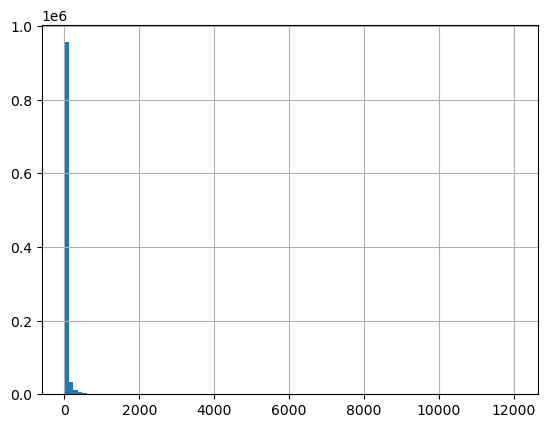

In [12]:
df_group['value'].hist(bins = 100)
plt.show()

[]

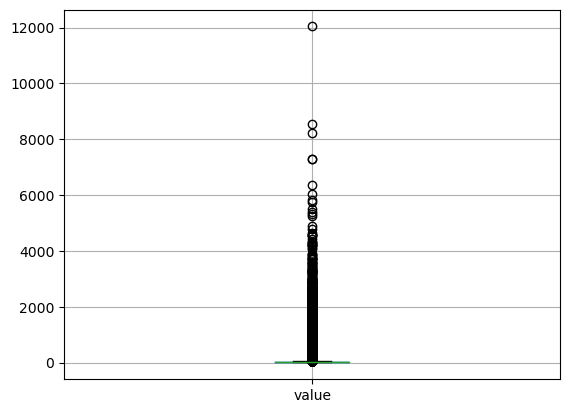

In [13]:
box_plot=df_group.boxplot(column='value')
box_plot.plot()

In [14]:
df_group['value'].sort_index().value_counts()

value
1        268288
2        128320
3         78055
4         54835
5         40767
          ...  
2740          1
1814          1
12041         1
3227          1
5759          1
Name: count, Length: 1849, dtype: int64

In [15]:
df_group.head()

,start_station_name,end_station_name,value
0,1 Ave & E 110 St,1 Ave & E 110 St,791
1,1 Ave & E 110 St,1 Ave & E 18 St,2
2,1 Ave & E 110 St,1 Ave & E 30 St,4
3,1 Ave & E 110 St,1 Ave & E 39 St,1
4,1 Ave & E 110 St,1 Ave & E 44 St,12


In [16]:
path=r'C:\Users\akul_\OneDrive\Documents\Tarishi\CF Data analysis bootcamp\Data visualizations with Python (Specialization)\Achievement 2- Dashboards with Python\New-York-Citi-Bike'

In [17]:
df_group.to_csv(os.path.join("Data", "df_groupby_final.csv"), index=False)

In [25]:
merged_df = pd.merge(df, df_group, on=['start_station_name', 'end_station_name'], how='inner')

In [26]:
merged_df.head()

,ride_id,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,date,avgTemp,value_x,value_y
0,BFD29218AB271154,West End Ave & W 107 St,Mt Morris Park W & W 120 St,40.802117,-73.968181,40.804038,-73.945925,2022-01-21,-6.0,1,54
1,7C953F2FD7BE1302,4 Ave & 3 St,Boerum Pl\t& Pacific St,40.673746,-73.985649,40.688489,-73.991160,2022-01-10,1.6,1,44
2,95893ABD40CED4B8,1 Ave & E 62 St,5 Ave & E 29 St,40.761227,-73.960940,40.745168,-73.986831,2022-01-26,-2.3,1,55
3,F853B50772137378,2 Ave & E 96 St,5 Ave & E 29 St,40.783964,-73.947167,40.745168,-73.986831,2022-01-03,1.4,1,14
4,7590ADF834797B4B,6 Ave & W 34 St,5 Ave & E 29 St,40.749640,-73.988050,40.745168,-73.986831,2022-01-22,-5.9,1,270


In [27]:
merged_df = merged_df.drop(columns=['value_x'])

In [28]:
merged_df = merged_df.rename(columns={'value_y': 'trips'})

In [29]:
merged_df.head()

,ride_id,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,date,avgTemp,trips
0,BFD29218AB271154,West End Ave & W 107 St,Mt Morris Park W & W 120 St,40.802117,-73.968181,40.804038,-73.945925,2022-01-21,-6.0,54
1,7C953F2FD7BE1302,4 Ave & 3 St,Boerum Pl\t& Pacific St,40.673746,-73.985649,40.688489,-73.991160,2022-01-10,1.6,44
2,95893ABD40CED4B8,1 Ave & E 62 St,5 Ave & E 29 St,40.761227,-73.960940,40.745168,-73.986831,2022-01-26,-2.3,55
3,F853B50772137378,2 Ave & E 96 St,5 Ave & E 29 St,40.783964,-73.947167,40.745168,-73.986831,2022-01-03,1.4,14
4,7590ADF834797B4B,6 Ave & W 34 St,5 Ave & E 29 St,40.749640,-73.988050,40.745168,-73.986831,2022-01-22,-5.9,270


In [31]:
merged_df.shape

(29768714, 10)

In [32]:
merged_df.to_csv(os.path.join("Data", "df_final_locations_for_map.csv"), index=False)

### 4. Plot the map

In [33]:
## Since the dataset is huge, the file was choking every time I ran the whole dataframe. Hence, I am randomly sampling the dataset
df_sample = merged_df.sample(50000, random_state=42)  # 50k rows
m = KeplerGl(height=700, data={"data_1": df_sample})

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


C:\Users\akul_\anaconda3\envs\NY_Citi_Bikes\Lib\site-packages\jupyter_client\session.py:721: UserWarning: Message serialization failed with:
Out of range float values are not JSON compliant: nan
Supporting this message is deprecated in jupyter-client 7, please make sure your message is JSON-compliant
  content = self.pack(content)


In [35]:
config = m.config

In [36]:
config

{}

In [38]:
# save map to HTML
m.save_to_html(file_name = 'NY_bike_trips_kepler_map.html', read_only = False, config = config)


Map saved to NY_bike_trips_kepler_map.html!


#### Due to different versions of Kepler.gl, ipywidgets and jupyter lab, the map was giving errors. Hence, I saved it to an HTML file. 

#### After adding layers and filtering it with trips that are more than 1000 values, so that they are not unique and more frequent. It is seen that the 12 Ave and W 40 st are the most popular start stations. Other popular start stations are University PI & E 14 st. There are also several other trips are very frequent on the east side of the city but are shorter. 